In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as IMBPipeline


In [3]:
# Load the dataset
data = pd.read_csv("/Users/sowmyaila/Downloads/processed-data.csv")

# Display the first few rows of the dataframe
print(data.head())


   Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  None_Sympton  \
0          1          1                        1            1             0   
1          1          1                        1            1             0   
2          1          1                        1            1             0   
3          1          1                        1            1             0   
4          1          1                        1            1             0   

   Pains  Nasal-Congestion  Runny-Nose  None_Experiencing  Age_0-9  Age_10-19  \
0      1                 1           1                  0        1          0   
1      1                 1           1                  0        1          0   
2      1                 1           1                  0        1          0   
3      1                 1           1                  0        1          0   
4      1                 1           1                  0        1          0   

   Age_20-24  Age_25-59  Age_60+  Gend

In [4]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values
# Assuming mean imputation is suitable based on the dataset's characteristics
data.fillna(data.mean(), inplace=True)  # Fill numerical missing values with the mean



Missing values in each column:
 Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
dtype: int64


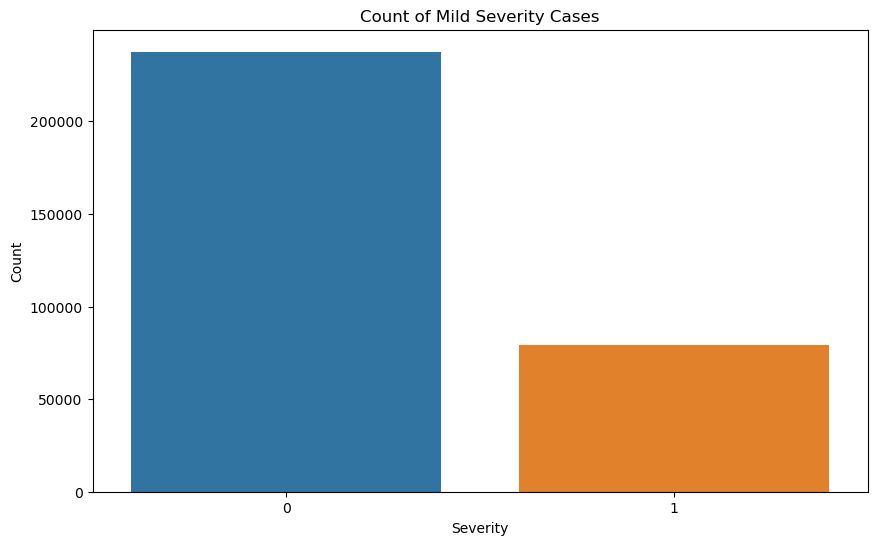

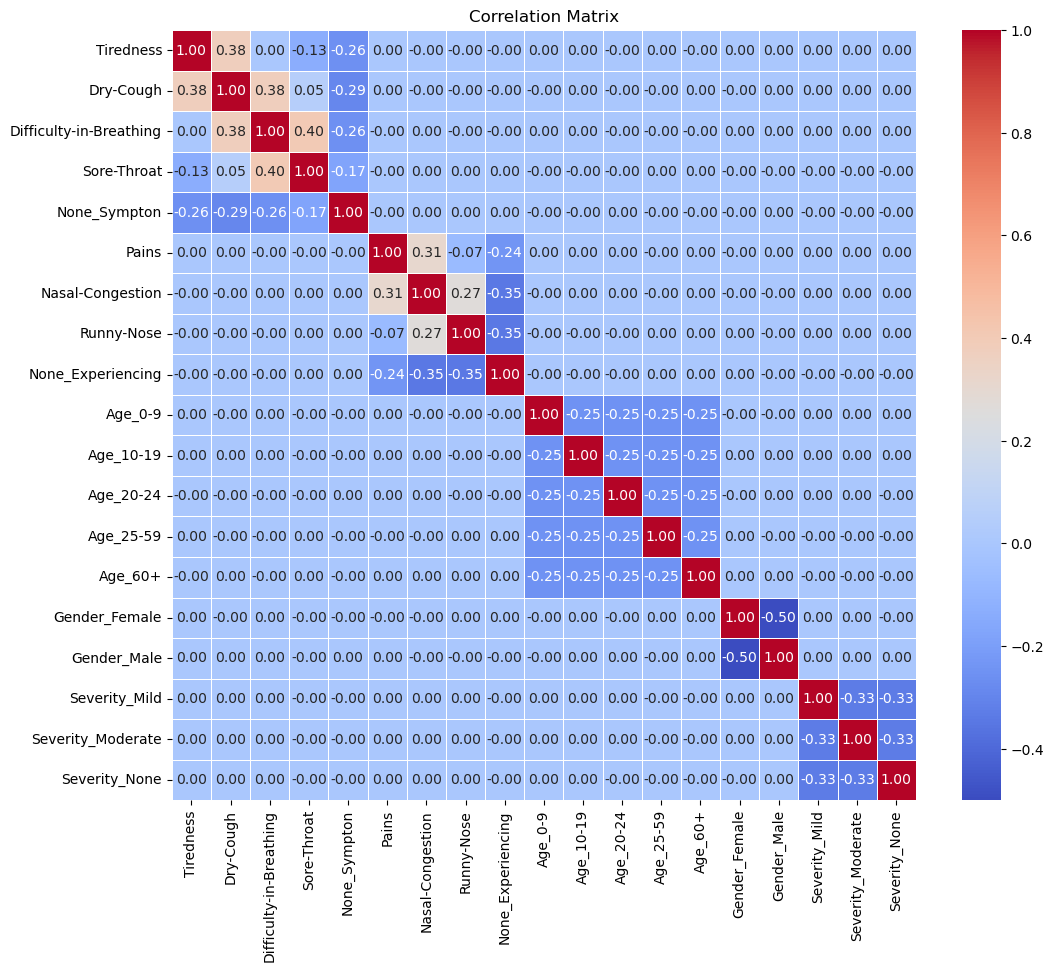

In [5]:
# Visualizing the distribution of key variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity_Mild', data=data)
plt.title('Count of Mild Severity Cases')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


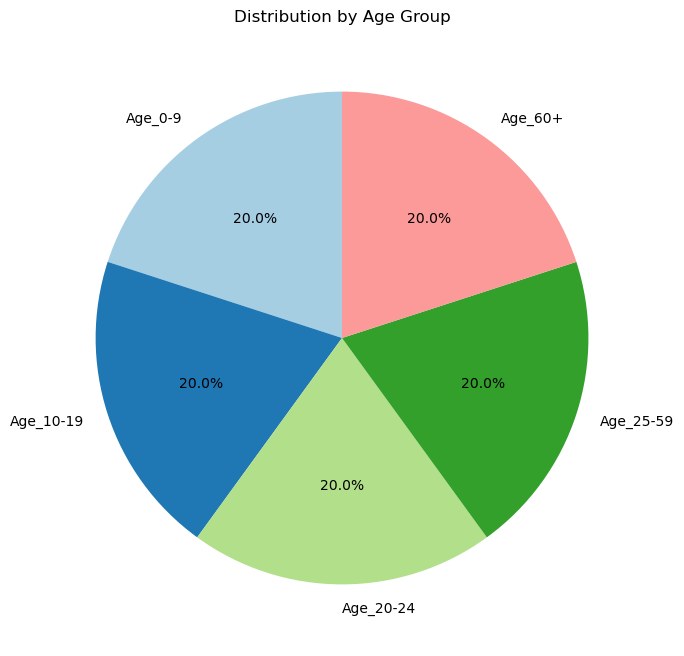

In [14]:
# Sum the count of each age group
age_distribution = data.filter(regex='Age_').sum()  # Adjust regex if different column naming

# Plotting pie chart for age distribution
plt.figure(figsize=(8, 8))
age_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(np.arange(len(age_distribution))))
plt.title('Distribution by Age Group')
plt.ylabel('')  # Hiding the y-label as it's not necessary for pie charts
plt.show()


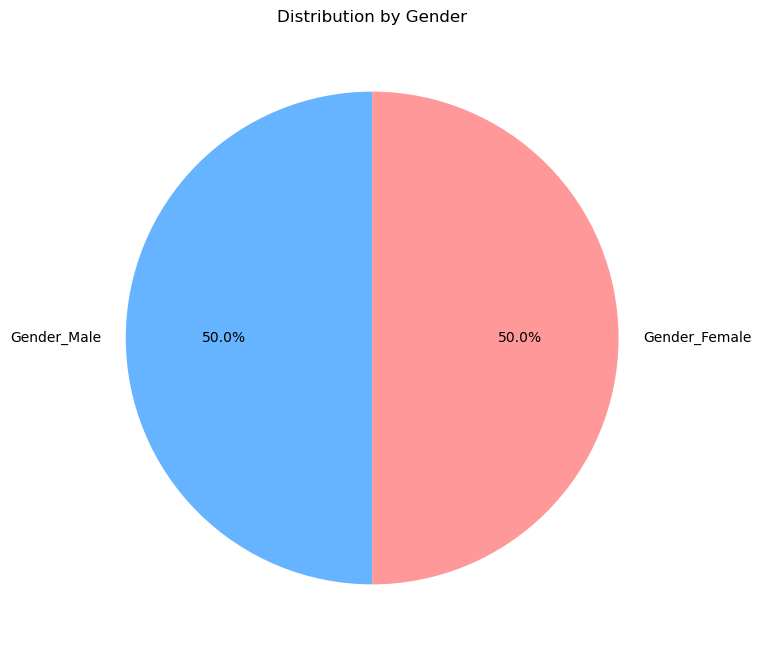

In [15]:
# Sum the count of each gender
gender_distribution = data[['Gender_Male', 'Gender_Female']].sum()  # Adjust column names as necessary

# Plotting pie chart for gender distribution
plt.figure(figsize=(8, 8))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution by Gender')
plt.ylabel('')
plt.show()


In [6]:
# Define features and target
X = data.drop('Severity_Mild', axis=1)
y = data['Severity_Mild']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Set up a pipeline with SMOTE and a classifier
pipeline_rf = IMBPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Parameters for GridSearchCV
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}

# Grid search with cross-validation
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [10]:
# Predicting and evaluating the model
y_pred_rf = grid_rf.predict(X_test)

print("Best parameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Best parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Accuracy: 0.7519097222222222
Confusion Matrix:
 [[31666 15719]
 [    0 15975]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80     47385
           1       0.50      1.00      0.67     15975

    accuracy                           0.75     63360
   macro avg       0.75      0.83      0.74     63360
weighted avg       0.87      0.75      0.77     63360



In [11]:
# Set up a pipeline with SMOTE and Gradient Boosting Classifier
pipeline_gb = IMBPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Parameters for GridSearchCV
param_grid_gb = {
    'classifier__n_estimators': [100, 150],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__max_depth': [3, 5]
}

# Grid search with cross-validation
grid_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_gb = grid_gb.predict(X_test)

print("Best parameters for Gradient Boosting:", grid_gb.best_params_)
print("Accuracy for Gradient Boosting:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix for Gradient Boosting:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report for Gradient Boosting:\n", classification_report(y_test, y_pred_gb))


Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Accuracy for Gradient Boosting: 0.7519097222222222
Confusion Matrix for Gradient Boosting:
 [[31666 15719]
 [    0 15975]]
Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80     47385
           1       0.50      1.00      0.67     15975

    accuracy                           0.75     63360
   macro avg       0.75      0.83      0.74     63360
weighted avg       0.87      0.75      0.77     63360



In [13]:
# Set up a pipeline with SMOTE and K-Nearest Neighbors Classifier
pipeline_knn = IMBPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Parameters for GridSearchCV
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}

# Grid search with cross-validation
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred_knn = grid_knn.predict(X_test)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Accuracy for KNN:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))


Best parameters for KNN: {'classifier__n_neighbors': 3, 'classifier__weights': 'uniform'}
Accuracy for KNN: 0.7453282828282828
Confusion Matrix for KNN:
 [[39431  7954]
 [ 8182  7793]]
Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83     47385
           1       0.49      0.49      0.49     15975

    accuracy                           0.75     63360
   macro avg       0.66      0.66      0.66     63360
weighted avg       0.74      0.75      0.74     63360



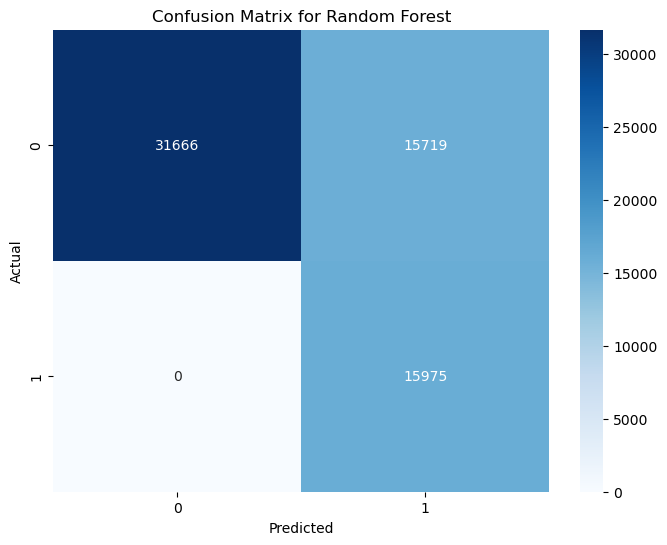

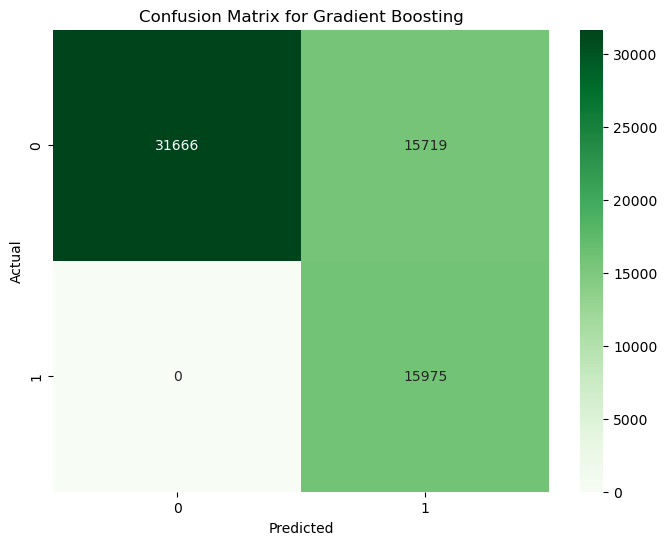

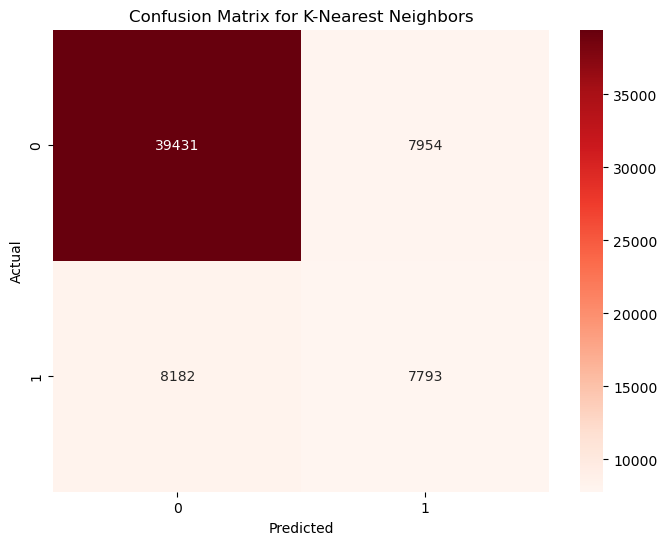

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion matrix for K-Nearest Neighbors
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
